In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [2]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = False   # set to False if you have downloaded

In [3]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./MNIST_DATA/',
    train=True,  # True -> training data, False -> testing data
    # Converts a PIL.Image or numpy.ndarray to torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    transform=torchvision.transforms.ToTensor(),    
    download=DOWNLOAD_MNIST,
)

torch.Size([60000, 28, 28])
torch.Size([60000])


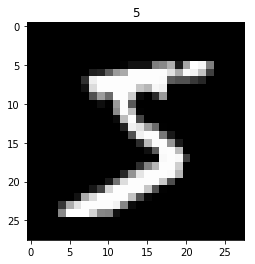

In [4]:
# plot one example
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [5]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_data = torchvision.datasets.MNIST(root='./MNIST_DATA/', train=False)

# shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
# (2000, 1, 28, 28) = (batch_size, D, H, W)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255.
test_y = test_data.test_labels[:2000]

In [6]:
len(test_x)

2000

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28) = (D, H, W)
            nn.Conv2d(
                in_channels=1,              # input D
                out_channels=16,            # output D
                kernel_size=5,              # filter size (5x5)
                stride=1,
                padding=2,               
            ),                              # Conv2d  output: (16, 28, 28)
            nn.ReLU(),                      # ReLU    output: (16, 28, 28)
            nn.MaxPool2d(kernel_size=2),    # Maxpool output: (16, 14, 14) since H, W = H/2, W/2
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),     # Conv2d  output: (32, 14, 14)
            nn.ReLU(),                      # ReLU    output: (32, 14, 14)
            nn.MaxPool2d(2),                # Maxpool output: (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output  # return x for visualization

In [8]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [9]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss() 

In [10]:
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        batch_x = Variable(batch_x)  # batch x
        batch_y = Variable(batch_y)  # batch y
        
        batch_y_hat = cnn(batch_x)  # input x to the NN
        loss = loss_func(batch_y_hat, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 50 == 0:
            test_y_hat = cnn(test_x)
            test_loss = loss_func(test_y_hat, test_y)
            pred_y = torch.max(test_y_hat, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Step: %04d | test loss: %.4f | test accuracy: %.4f' % (step, test_loss, accuracy))

Step: 0000 | test loss: 2.2959 | test accuracy: 0.1285
Step: 0050 | test loss: 0.5473 | test accuracy: 0.8250
Step: 0100 | test loss: 0.3644 | test accuracy: 0.8925
Step: 0150 | test loss: 0.2810 | test accuracy: 0.9180
Step: 0200 | test loss: 0.2249 | test accuracy: 0.9335
Step: 0250 | test loss: 0.1933 | test accuracy: 0.9445
Step: 0300 | test loss: 0.1817 | test accuracy: 0.9385
Step: 0350 | test loss: 0.1489 | test accuracy: 0.9530
Step: 0400 | test loss: 0.1439 | test accuracy: 0.9570
Step: 0450 | test loss: 0.1272 | test accuracy: 0.9620
Step: 0500 | test loss: 0.1186 | test accuracy: 0.9650
Step: 0550 | test loss: 0.1475 | test accuracy: 0.9535
Step: 0600 | test loss: 0.1084 | test accuracy: 0.9655
Step: 0650 | test loss: 0.1183 | test accuracy: 0.9655
Step: 0700 | test loss: 0.0960 | test accuracy: 0.9715
Step: 0750 | test loss: 0.0812 | test accuracy: 0.9730
Step: 0800 | test loss: 0.0795 | test accuracy: 0.9770
Step: 0850 | test loss: 0.0831 | test accuracy: 0.9735
Step: 0900